In [1]:
import csv
import copy
import datetime
import iso639
import matplotlib
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patheffects as path_effects
from babel.languages import get_official_languages

In [2]:
df_papers = pd.read_csv(
    'in_lang_docs_all_bibitems.tsv',
    header=None,
    names = ['lang', 'uuid', 'citing_mid', 'cited_mid', 'citing_aid', 'cited_aid', 'bibitem_str'],
    sep='\t',
    low_memory=False,
    quoting=csv.QUOTE_NONE
)
df_papers = df_papers[df_papers.citing_mid.notna()]
df_papers.citing_mid = df_papers.citing_mid.astype(int)

In [3]:
len(df_papers.citing_mid.unique())

16300

In [4]:
df_mag_paa = pd.read_csv(
    'mag_202012/PaperAuthorAffiliations_filtered.txt',
    header=None,
    names = ['paperid', 'authorid', 'affiliationid',
             'authorsequencenumber', 'originalauthor', 'originalaffiliation'],
    sep='\t',
    low_memory=False,
    quoting=csv.QUOTE_NONE
)
df_mag_paa = df_mag_paa[df_mag_paa.affiliationid.notna()]
df_mag_paa.affiliationid = df_mag_paa.affiliationid.astype(int)

In [5]:
df_mag_a = pd.read_csv(
    'mag_202012/Affiliations.txt',
    header=None,
    names = ['affiliationid', 'rank', 'normalizedname',
             'displayname', 'gridid', 'officialpage',
             'wikipage', 'papercount', 'paperfamilycount',
             'citationcode', 'iso3166code', 'latitude', 'longidute',
             'createddate'],
    sep='\t',
    low_memory=False,
    quoting=csv.QUOTE_NONE
)
df_mag_a.affiliationid = df_mag_a.affiliationid.astype(int)

In [6]:
cit_lang_to_country_dict = dict()
for mid in df_papers.citing_mid.unique():
    langs = [x for x in df_papers[df_papers.citing_mid == mid].lang.unique() if type(x) == str]
    try:
        aff_id = list(df_mag_paa[df_mag_paa.paperid == mid].affiliationid)[0]
        aff_code = list(df_mag_a[df_mag_a.affiliationid == aff_id].iso3166code)[0]
        for lang in langs:
            if lang not in cit_lang_to_country_dict:
                cit_lang_to_country_dict[lang] = dict()
            if aff_code not in cit_lang_to_country_dict[lang]:
                cit_lang_to_country_dict[lang][aff_code] = 0
            cit_lang_to_country_dict[lang][aff_code] += 1
    except IndexError:
        continue

In [7]:
s_haystack = set(df_mag_paa.paperid)
s_needles = set(df_papers.citing_mid)
print(
    '{} papers w/ data\n{} papers searched\n{} overlap'.format(
        len(s_haystack),
        len(s_needles),
        len(s_haystack.intersection(s_needles))
    )
)

7522 papers w/ data
16300 papers searched
7522 overlap


In [8]:
import pprint
pprint.pprint(cit_lang_to_country_dict)

{'armenian': {'AM': 1, 'US': 1},
 'bulgarian': {'BE': 1, 'BG': 7, 'HU': 1, 'RU': 1},
 'catalan': {'ES': 3},
 'chinese': {nan: 5,
             'AT': 1,
             'AU': 8,
             'BE': 2,
             'CA': 14,
             'CH': 5,
             'CN': 377,
             'CO': 1,
             'DE': 11,
             'DK': 2,
             'EG': 2,
             'ES': 1,
             'FI': 3,
             'FR': 8,
             'GB': 13,
             'GR': 2,
             'HK': 8,
             'HR': 1,
             'HU': 2,
             'IL': 4,
             'IN': 4,
             'IR': 4,
             'IT': 5,
             'JP': 2,
             'KP': 2,
             'KR': 6,
             'MA': 1,
             'MX': 3,
             'NL': 1,
             'PL': 3,
             'RU': 3,
             'SE': 1,
             'SG': 3,
             'SI': 1,
             'SK': 1,
             'TH': 1,
             'TW': 9,
             'US': 169},
 'cremonese': {'DE': 1},
 'croatian': {'ES': 1, '

In [9]:
df_papers.lang.unique()

array([nan, 'japanese', 'german', 'chinese', 'russian', 'ukrainian',
       'hungarian', 'bulgarian', 'french', 'polish', 'farsi',
       'portuguese', 'romanian', 'italian', 'croatian', 'slovenian',
       'english', 'armenian', 'czech', 'spanish', 'turkish', 'dutch',
       'greek', 'slovak', 'korean', 'icelandic', 'latin', 'catalan',
       'danish', 'swedish', 'hindi', 'finnish', 'hebrew', 'serbian',
       'norwegian', 'vietnamese', 'macedonian', 'sanskrit', 'marathi',
       'georgian', 'cremonese', 'latvian', 'indonesian', 'estonian',
       'esperanto', 'belarusian'], dtype=object)

In [10]:
aff_countries_by_count = list(df_mag_a.iso3166code.value_counts().keys())
aff_countries_by_count

['US',
 'GB',
 'IN',
 'JP',
 'CA',
 'CN',
 'DE',
 'AU',
 'FR',
 'KR',
 'RU',
 'IT',
 'BR',
 'NL',
 'CH',
 'TW',
 'ES',
 'PK',
 'NO',
 'TR',
 'SE',
 'BE',
 'IR',
 'IE',
 'PH',
 'DK',
 'MX',
 'ZA',
 'AT',
 'PL',
 'IL',
 'BD',
 'FI',
 'SG',
 'UA',
 'TH',
 'MY',
 'NG',
 'NZ',
 'GR',
 'ID',
 'HK',
 'PT',
 'AR',
 'CZ',
 'CO',
 'EG',
 'VN',
 'UG',
 'SA',
 'AE',
 'KE',
 'HU',
 'GH',
 'IQ',
 'RO',
 'CL',
 'BG',
 'LK',
 'NP',
 'TZ',
 'JO',
 'EE',
 'PR',
 'HR',
 'ET',
 'PE',
 'SI',
 'LB',
 'DZ',
 'CY',
 'LU',
 'VE',
 'KW',
 'SD',
 'SK',
 'LT',
 'CU',
 'LV',
 'RS',
 'BA',
 'ZW',
 'MM',
 'KZ',
 'TN',
 'GE',
 'AZ',
 'AL',
 'UZ',
 'BY',
 'BH',
 'AM',
 'EC',
 'CM',
 'SY',
 'QA',
 'MK',
 'UY',
 'IS',
 'KH',
 'LY',
 'OM',
 'JM',
 'KG',
 'PA',
 'YE',
 'DO',
 'MD',
 'MA',
 'ZM',
 'CD',
 'MN',
 'MU',
 'MO',
 'MW',
 'CR',
 'TT',
 'PG',
 'GT',
 'BW',
 'FJ',
 'BM',
 'TJ',
 'PY',
 'CI',
 'BO',
 'SN',
 'BN',
 'ML',
 'SO',
 'AF',
 'SV',
 'ME',
 'MT',
 'NI',
 'KN',
 'GM',
 'BJ',
 'LA',
 'LI',
 'SL',
 'MC',
 'MZ',

In [11]:
# Most common language per country

lang_to_countries = {}

# https://unicode-org.github.io/cldr-staging/charts/latest/supplemental/territory_language_information.html
for country in aff_countries_by_count:
    lang = get_official_languages(country, de_facto=True)[0].split('_')[0]
    if lang not in lang_to_countries:
        lang_to_countries[lang] = []
    lang_to_countries[lang].append(country)
    print('{} - {}'.format(
        country,
        lang
    ))

US - en
GB - en
IN - hi
JP - ja
CA - en
CN - zh
DE - de
AU - en
FR - fr
KR - ko
RU - ru
IT - it
BR - pt
NL - nl
CH - de
TW - zh
ES - es
PK - ur
NO - nb
TR - tr
SE - sv
BE - nl
IR - fa
IE - en
PH - en
DK - da
MX - es
ZA - en
AT - de
PL - pl
IL - he
BD - bn
FI - fi
SG - en
UA - uk
TH - th
MY - ms
NG - en
NZ - en
GR - el
ID - id
HK - zh
PT - pt
AR - es
CZ - cs
CO - es
EG - ar
VN - vi
UG - sw
SA - ar
AE - ar
KE - sw
HU - hu
GH - en
IQ - ar
RO - ro
CL - es
BG - bg
LK - si
NP - ne
TZ - sw
JO - ar
EE - et
PR - es
HR - hr
ET - am
PE - es
SI - sl
LB - ar
DZ - ar
CY - el
LU - fr
VE - es
KW - ar
SD - en
SK - sk
LT - lt
CU - es
LV - lv
RS - sr
BA - bs
ZW - sn
MM - my
KZ - ru
TN - ar
GE - ka
AZ - az
AL - sq
UZ - uz
BY - be
BH - ar
AM - hy
EC - es
CM - fr
SY - ar
QA - ar
MK - mk
UY - es
IS - is
KH - km
LY - ar
OM - ar
JM - en
KG - ky
PA - es
YE - ar
DO - es
MD - ro
MA - ar
ZM - en
CD - fr
MN - mn
MU - en
MO - zh
MW - ny
CR - es
TT - en
PG - tpi
GT - es
BW - en
FJ - en
BM - en
TJ - tg
PY - gn
CI - fr

In [12]:
# Language name to iso code

for lang in df_papers.lang.unique():
    try:
        print('{} - {}'.format(lang, iso639.to_iso639_1(lang)))
    except iso639.NonExistentLanguageError:
        print('{} - #####'.format(lang))

nan - #####
japanese - ja
german - de
chinese - zh
russian - ru
ukrainian - uk
hungarian - hu
bulgarian - bg
french - fr
polish - pl
farsi - fa
portuguese - pt
romanian - ro
italian - it
croatian - hr
slovenian - sl
english - en
armenian - hy
czech - cs
spanish - es
turkish - tr
dutch - nl
greek - el
slovak - sk
korean - ko
icelandic - is
latin - la
catalan - ca
danish - da
swedish - sv
hindi - hi
finnish - fi
hebrew - he
serbian - sr
norwegian - no
vietnamese - vi
macedonian - mk
sanskrit - sa
marathi - mr
georgian - ka
cremonese - #####
latvian - lv
indonesian - id
estonian - et
esperanto - eo
belarusian - be


In [13]:
def affiliation_countries_by_mag_paper_id(mid):
    author_affiliations = list(df_mag_paa[df_mag_paa.paperid == mid].affiliationid)
    aff_codes = []
    for auth_aff in author_affiliations:
        aff_codes.extend(list(df_mag_a[df_mag_a.affiliationid == auth_aff].iso3166code))
    if len(aff_codes) > 0:
        return aff_codes
    else:
        return np.nan

for mid in df_papers.citing_mid.unique()[:10]:
    print(affiliation_countries_by_mag_paper_id(mid))

['JP']
nan
['US']
nan
['IN', 'IN', 'IN']
['CA', 'CA']
['GB', 'GB']
['JP', 'JP', 'JP']
nan
nan


In [14]:
def lang_to_iso(lang):
    if type(lang) != str:
        return np.nan
    try:
        code = iso639.to_iso639_1(lang)
    except iso639.NonExistentLanguageError:
        if lang == 'cremonese':
            code = 'lmo'   # approximate dialect to closest language with ISO code
        else:
            code = '?'
    return code

{lang_to_iso(k): v for k, v in df_papers.lang.value_counts().to_dict().items()}

{'ru': 21142,
 'zh': 2204,
 'ja': 1685,
 'de': 1123,
 'fr': 857,
 'uk': 780,
 'pl': 378,
 'hu': 292,
 'it': 185,
 'pt': 145,
 'en': 145,
 'es': 140,
 'ro': 101,
 'cs': 88,
 'bg': 64,
 'el': 52,
 'sk': 45,
 'nl': 40,
 'da': 35,
 'ko': 35,
 'sr': 31,
 'tr': 23,
 'hr': 14,
 'fi': 14,
 'he': 14,
 'la': 13,
 'vi': 10,
 'fa': 9,
 'ca': 8,
 'no': 6,
 'sl': 5,
 'sv': 5,
 'hy': 4,
 'is': 4,
 'sa': 2,
 'ka': 2,
 'mk': 2,
 'lv': 1,
 'et': 1,
 'lmo': 1,
 'hi': 1,
 'mr': 1,
 'eo': 1,
 'be': 1,
 'id': 1}

In [15]:
ref_lang_to_auth_aff_matrix_column_labels = []
ref_lang_to_auth_aff_matrix_row_labels = []

for lang in df_papers.lang.value_counts().keys():
    lang_code = lang_to_iso(lang)
    country_codes = lang_to_countries.get(lang_code, [])
    print('{} -> {}'.format(lang_code, country_codes))
    if len(country_codes) < 1:
        continue
    
    ref_lang_to_auth_aff_matrix_column_labels.extend(country_codes)
    ref_lang_to_auth_aff_matrix_row_labels.append(lang_code)

# add English speaking countries to observation
# ref_lang_to_auth_aff_matrix_column_labels.extend(lang_to_countries['en'])

ru -> ['RU', 'KZ']
zh -> ['CN', 'TW', 'HK', 'MO']
ja -> ['JP']
de -> ['DE', 'CH', 'AT', 'LI']
fr -> ['FR', 'LU', 'CM', 'CD', 'CI', 'ML', 'BJ', 'MC', 'NC', 'GF', 'NE', 'GA', 'TD', 'TG', 'CG', 'BF', 'RE', 'PF', 'SC', 'GN']
uk -> ['UA']
pl -> ['PL']
hu -> ['HU']
it -> ['IT', 'VA']
pt -> ['BR', 'PT', 'MZ', 'GW', 'AO', 'CV']
en -> ['US', 'GB', 'CA', 'AU', 'IE', 'PH', 'ZA', 'SG', 'NG', 'NZ', 'GH', 'SD', 'JM', 'ZM', 'MU', 'TT', 'BW', 'FJ', 'BM', 'KN', 'GM', 'SL', 'DM', 'BZ', 'JE', 'MS', 'KY', 'GU', 'GY', 'BB', 'AG', 'VI', 'LR', 'GI', 'VC', 'MH', 'MP', 'BS', 'SZ', 'GD', 'LC']
es -> ['ES', 'MX', 'AR', 'CO', 'CL', 'PR', 'PE', 'VE', 'CU', 'EC', 'UY', 'PA', 'DO', 'CR', 'GT', 'BO', 'SV', 'NI', 'HN']
ro -> ['RO', 'MD']
cs -> ['CZ']
bg -> ['BG']
el -> ['GR', 'CY']
sk -> ['SK']
nl -> ['NL', 'BE', 'SR', 'AW']
da -> ['DK']
ko -> ['KR', 'KP']
sr -> ['RS', 'ME']
tr -> ['TR']
hr -> ['HR']
fi -> ['FI']
he -> ['IL']
la -> []
vi -> ['VN']
fa -> ['IR', 'AF']
ca -> []
no -> []
sl -> ['SI']
sv -> ['SE']
hy -> ['

In [16]:
df_ref_lang_to_auth_aff_matrix = pd.DataFrame(
    columns=ref_lang_to_auth_aff_matrix_column_labels,
    index=ref_lang_to_auth_aff_matrix_row_labels
).fillna(0)

df_ref_lang_to_auth_aff_matrix

,RU,KZ,CN,TW,HK,MO,JP,DE,CH,AT,...,SE,AM,IS,GE,MK,LV,EE,IN,BY,ID
ru,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ja,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
de,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
uk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
it,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# tally up references to a language by an author from a coutry with some (de facto) primary language
for idx, ref in df_papers[df_papers.lang.notna()].iterrows():
    lang_code = lang_to_iso(ref.lang)
    country_codes = affiliation_countries_by_mag_paper_id(ref.citing_mid)
    if type(country_codes) == list:
        for country_code in country_codes:
            if (lang_code in df_ref_lang_to_auth_aff_matrix.index
                and country_code in df_ref_lang_to_auth_aff_matrix.columns):
                df_ref_lang_to_auth_aff_matrix.at[lang_code, country_code] += 1

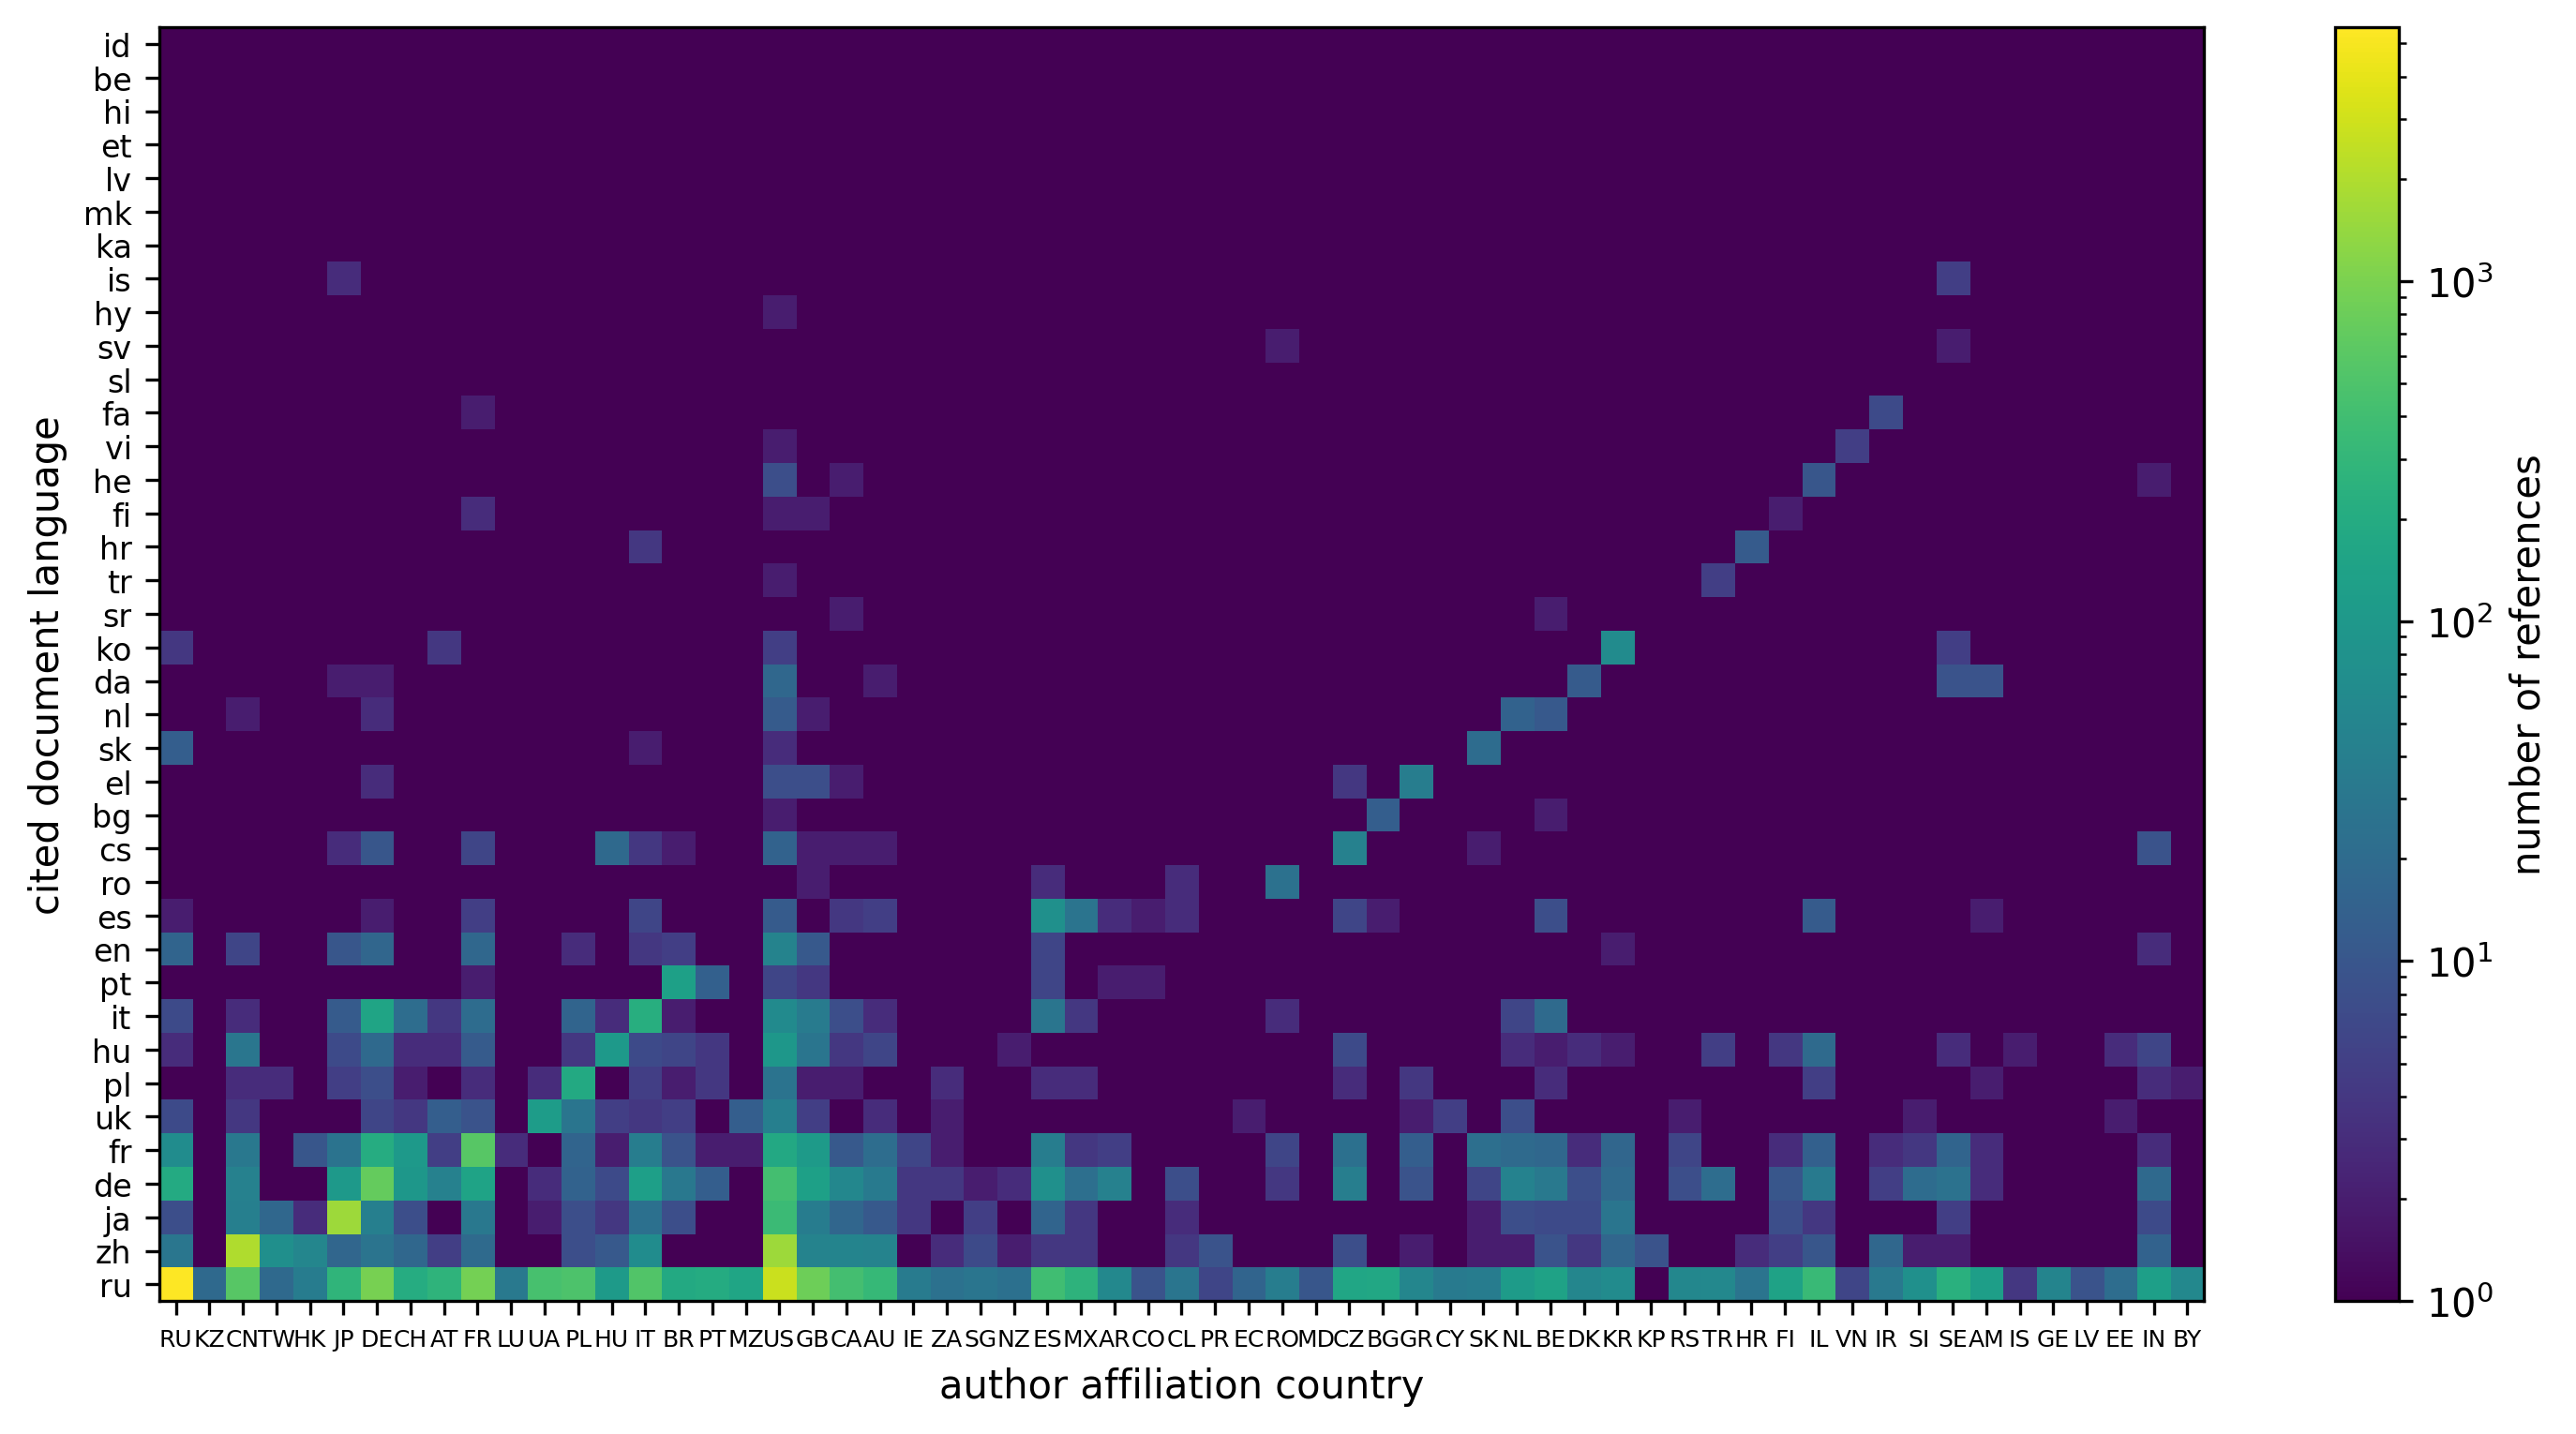

In [18]:
df_rltaam_filtered = df_ref_lang_to_auth_aff_matrix.loc[:, (df_ref_lang_to_auth_aff_matrix.sum(axis=0) >= 5)]

my_cmap = copy.copy(matplotlib.cm.get_cmap('viridis')) # copy the default cmap
my_cmap.set_bad(my_cmap.colors[0])

fig=plt.figure(figsize=(12, 6), dpi=300, facecolor='w', edgecolor='k')
plt.imshow(
    df_rltaam_filtered,
    norm=colors.LogNorm(),
    interpolation='none', 
    cmap=my_cmap,
    origin='lower',
)
plt.yticks(np.arange(0, len(df_rltaam_filtered.index), 1), df_rltaam_filtered.index, fontsize=8)
plt.xticks(np.arange(0, len(df_rltaam_filtered.columns), 1), df_rltaam_filtered.columns, fontsize=6)
plt.colorbar(label='number of references')
plt.xlabel('author affiliation country')
plt.ylabel('cited document language')
plt.show()

In [19]:
df_ref_lang_to_auth_aff_matrix.loc[:, (df_ref_lang_to_auth_aff_matrix.sum(axis=0) >= 1)]

,RU,KZ,CN,TW,HK,MO,JP,DE,CH,AT,...,SE,AM,IS,GE,MK,LV,EE,IN,BY,ID
ru,5580,19,587,19,37,1,280,942,212,273,...,241,126,4,49,1,9,22,131,57,1
zh,30,0,1981,74,53,1,17,28,18,5,...,2,1,0,1,0,0,0,15,0,0
ja,8,0,41,18,3,0,1603,42,8,1,...,5,0,0,0,0,0,0,7,0,0
de,192,1,45,1,0,0,102,726,95,45,...,26,3,0,0,0,0,0,19,0,0
fr,66,0,32,0,10,0,27,212,103,5,...,16,3,0,1,0,0,0,3,1,0
uk,7,0,4,0,0,0,0,6,4,13,...,0,0,0,0,0,0,2,0,0,0
pl,1,0,3,3,0,0,5,8,2,0,...,0,2,0,0,0,0,0,3,2,0
hu,3,0,30,0,0,0,7,19,3,3,...,3,0,2,0,0,0,3,6,0,0
it,7,0,3,0,0,0,12,156,22,4,...,1,0,0,0,0,0,0,1,0,0
pt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
# country_langs = ref_lang_to_auth_aff_matrix_row_labels + ['en']
country_langs = ref_lang_to_auth_aff_matrix_row_labels

df_lang_to_lang_matrix = pd.DataFrame(
    columns=country_langs,
    index=ref_lang_to_auth_aff_matrix_row_labels
).fillna(0)

for lang in country_langs:
    df_lang_to_lang_matrix[lang] = df_ref_lang_to_auth_aff_matrix[lang_to_countries[lang]].sum(axis=1)
    
df_lang_to_lang_matrix

,ru,zh,ja,de,fr,uk,pl,hu,it,pt,...,sv,hy,is,ka,mk,lv,et,hi,be,id
ru,5599,644,280,1427,968,459,501,110,542,551,...,241,126,4,49,1,9,22,131,57,1
zh,30,2109,17,51,20,0,8,11,66,0,...,2,1,0,1,0,0,0,15,0,0
ja,8,62,1603,51,32,2,8,4,24,9,...,5,0,0,0,0,0,0,7,0,0
de,193,46,102,866,151,3,15,7,130,45,...,26,3,0,0,0,0,0,19,0,0
fr,66,42,27,320,593,0,16,2,39,13,...,16,3,0,1,0,0,0,3,1,0
uk,7,4,0,23,9,119,29,5,4,19,...,0,0,0,0,0,0,2,0,0,0
pl,1,6,5,10,3,3,188,1,5,7,...,0,2,0,0,0,0,0,3,2,0
hu,3,30,7,25,12,0,4,105,7,11,...,3,0,2,0,0,0,3,6,0,0
it,7,3,12,182,21,0,16,3,223,2,...,1,0,0,0,0,0,0,1,0,0
pt,0,0,0,0,2,0,1,0,0,149,...,0,0,0,0,0,1,0,0,0,0


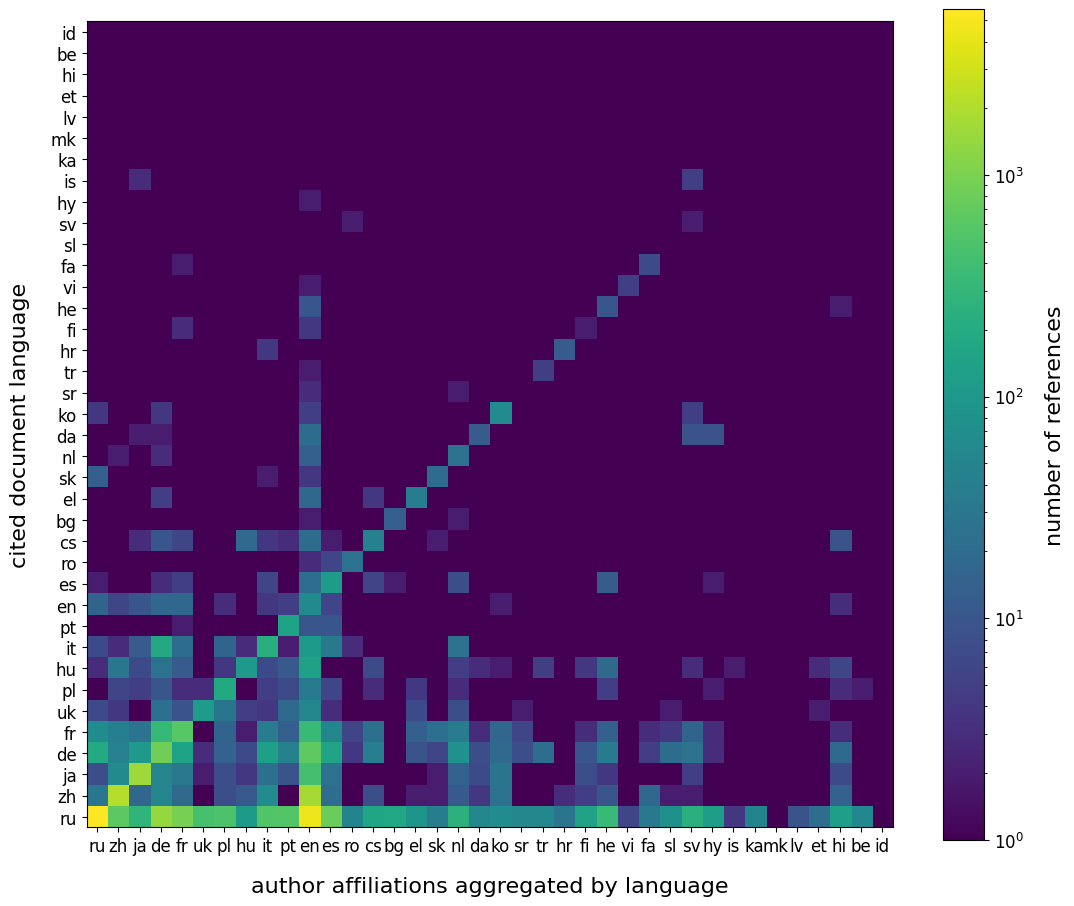

In [21]:
fig=plt.figure(figsize=(13,11), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(
    df_lang_to_lang_matrix,
    interpolation='none',
    norm=colors.LogNorm(),
    cmap=my_cmap,
    origin='lower',
)
plt.yticks(np.arange(0, len(df_lang_to_lang_matrix.index), 1), df_lang_to_lang_matrix.index, fontsize=12)
plt.xticks(np.arange(0, len(df_lang_to_lang_matrix.columns), 1), df_lang_to_lang_matrix.columns, fontsize=12)
cbar = plt.colorbar()
cbar.set_label(label='number of references', fontsize=16, labelpad=15)
cbar.ax.tick_params(labelsize=12) 
plt.xlabel('author affiliations aggregated by language', fontsize=16, labelpad=15)
plt.ylabel('cited document language', fontsize=16, labelpad=15)
plt.savefig('citlang_to_author_aff_all_absolute.pdf')
plt.show()

In [22]:
count_local = pd.Series(
    np.diag(df_lang_to_lang_matrix),
    index=[
        df_lang_to_lang_matrix.index,
        df_lang_to_lang_matrix.columns
    ]
).to_numpy().sum()
count_total = df_lang_to_lang_matrix.to_numpy().sum()
count_en = df_lang_to_lang_matrix.en.to_numpy().sum()

print(f'{count_local} out of {count_total} citations ({count_local/count_total:.2f}) local')
print(f'{count_en} out of {count_total} citations ({count_en/count_total:.2f}) local')

12021 out of 32324 citations (0.37) local
8248 out of 32324 citations (0.26) local


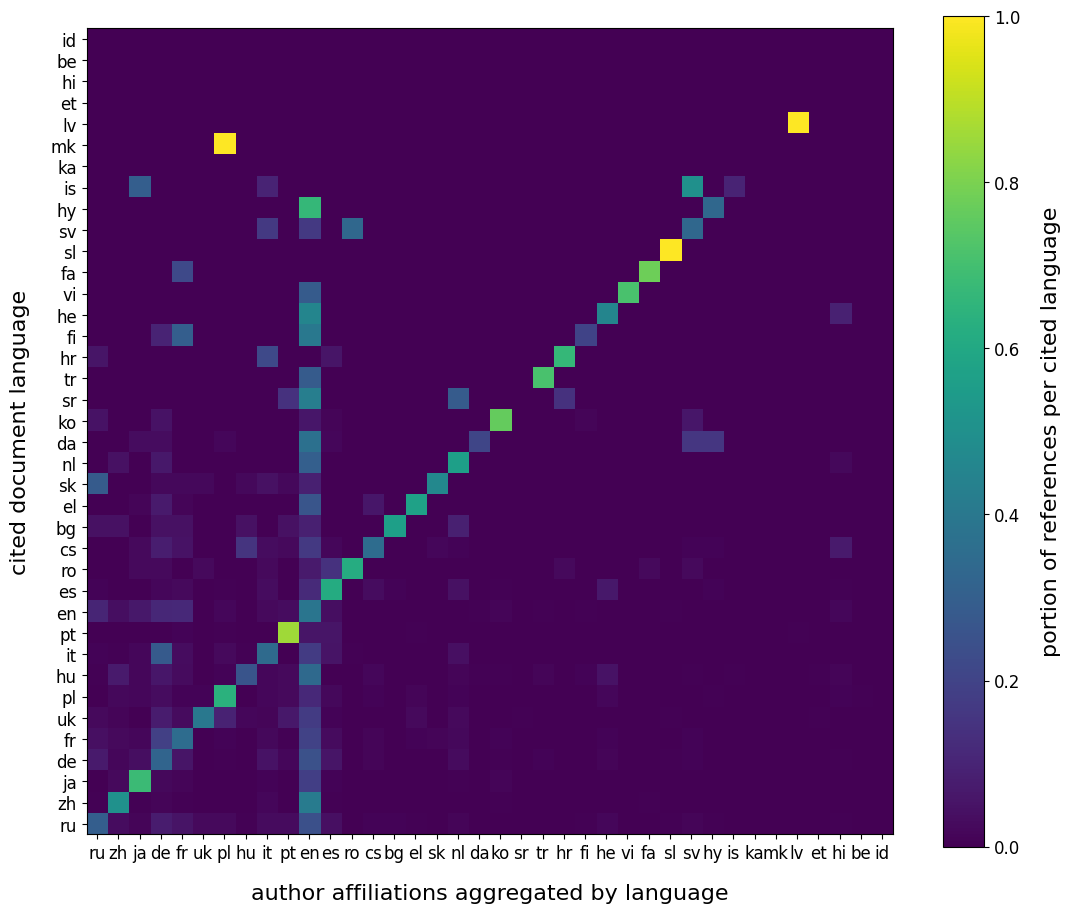

In [23]:
df_lang_to_lang_matrix_normalized = df_lang_to_lang_matrix.div(df_lang_to_lang_matrix.sum(axis=1), axis=0)

fig=plt.figure(figsize=(13,11), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(
    df_lang_to_lang_matrix_normalized,
    interpolation='none', 
    cmap=my_cmap,
    origin='lower',
)
plt.yticks(
    np.arange(0, len(df_lang_to_lang_matrix_normalized.index), 1),
    df_lang_to_lang_matrix_normalized.index,
    fontsize=12
    )
plt.xticks(
    np.arange(0, len(df_lang_to_lang_matrix_normalized.columns), 1),
    df_lang_to_lang_matrix_normalized.columns,
    fontsize=12
)
cbar = plt.colorbar()
cbar.set_label(label='portion of references per cited language', fontsize=16, labelpad=15)
cbar.ax.tick_params(labelsize=12) 
plt.xlabel('author affiliations aggregated by language', fontsize=16, labelpad=15)
plt.ylabel('cited document language', fontsize=16, labelpad=15)
plt.savefig('citlang_to_author_aff_all_relative.pdf')
plt.show()

### observations in above figure

* references to icelandic (10) from Japan (3) and Sweden (5)
* only reference to macedonian from Polish institution
* references to portuguese come primarily from portuguese speaking coutries (br, pt, mz, ao, cv, gw) (149 vs 10 en)
* languages w/ high "cited from home" rates
    * ja: 0.68 vs  0.19 from en
    * pt: 0.86 vs 0.06 from en
    * es: 0.61 vs 0.12 from en
    * ko: 0.76 vs 0.06 from en

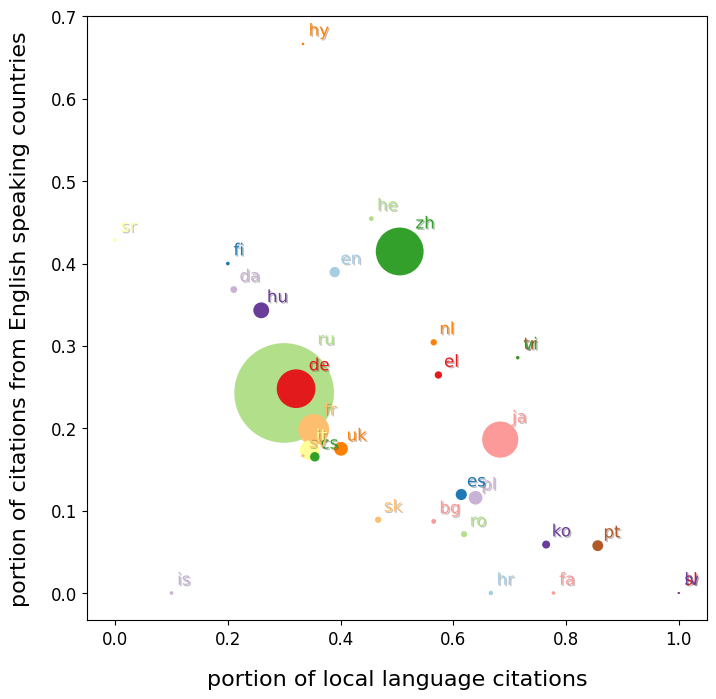

In [25]:
homecits_labels = []
homecits_sizes = []
homecits_home = []
homecits_en = []
count_max = df_lang_to_lang_matrix.loc['ru'].to_numpy().sum()
scaling_factor = 5000
for lang in df_lang_to_lang_matrix_normalized.index:
    self_ratio = df_lang_to_lang_matrix_normalized.at[lang,lang]
    en_ratio = df_lang_to_lang_matrix_normalized.at[lang,'en']
    if self_ratio + en_ratio > 0:
        homecits_labels.append(lang)
        count = df_lang_to_lang_matrix.loc[lang].to_numpy().sum()
        homecits_sizes.append((count/count_max)*scaling_factor)
        homecits_home.append(self_ratio)
        homecits_en.append(en_ratio)
    # print(f'{lang}: {self_ratio:.2f} /  {en_ratio:.2f}')

homecits_colors = [
    matplotlib.cm.get_cmap('Paired')((i+2)%12)
    for i in
    np.arange(len(homecits_home))
]

fig, ax = plt.subplots(figsize=(8, 8), dpi=100, facecolor='w', edgecolor='k')
ax.scatter(homecits_home,
           homecits_en,
           s=homecits_sizes,
           c=homecits_colors
          )

for i, label in enumerate(homecits_labels):
    ax.annotate(
        label,
        (homecits_home[i], homecits_en[i]),
        xytext = (
            homecits_home[i]+max((0.005*np.sqrt(homecits_sizes[i])/6), 0.01),
            homecits_en[i]+max((0.005*np.sqrt(homecits_sizes[i])/6), 0.01)
        ),
        c=homecits_colors[i],
        fontsize='large',
        path_effects=[path_effects.withSimplePatchShadow(offset=(1,-1))]
    )
ax.tick_params(labelsize=12) 
plt.xlabel(
    'portion of local language citations',
    fontsize=16,
    labelpad=15)
plt.ylabel(
    'portion of citations from English speaking countries',
    fontsize=16,
    labelpad=15)
plt.savefig('citation_origin_local_vs_en.pdf')
plt.show()

In [26]:
for i, lang in enumerate(homecits_labels):
    print(f'{lang}: {homecits_home[i]:.4f} <-> {homecits_en[i]:.4f}')

ru: 0.2999 <-> 0.2429
zh: 0.5049 <-> 0.4147
ja: 0.6833 <-> 0.1863
de: 0.3211 <-> 0.2481
fr: 0.3523 <-> 0.1985
uk: 0.4007 <-> 0.1751
pl: 0.6395 <-> 0.1156
hu: 0.2593 <-> 0.3432
it: 0.3452 <-> 0.1734
pt: 0.8563 <-> 0.0575
en: 0.3896 <-> 0.3896
es: 0.6141 <-> 0.1196
ro: 0.6190 <-> 0.0714
cs: 0.3543 <-> 0.1654
bg: 0.5652 <-> 0.0870
el: 0.5735 <-> 0.2647
sk: 0.4667 <-> 0.0889
nl: 0.5652 <-> 0.3043
da: 0.2105 <-> 0.3684
ko: 0.7647 <-> 0.0588
sr: 0.0000 <-> 0.4286
tr: 0.7143 <-> 0.2857
hr: 0.6667 <-> 0.0000
fi: 0.2000 <-> 0.4000
he: 0.4545 <-> 0.4545
vi: 0.7143 <-> 0.2857
fa: 0.7778 <-> 0.0000
sl: 1.0000 <-> 0.0000
sv: 0.3333 <-> 0.1667
hy: 0.3333 <-> 0.6667
is: 0.1000 <-> 0.0000
lv: 1.0000 <-> 0.0000


In [27]:
print(np.var(homecits_home))
print(np.min(homecits_home))
print(np.max(homecits_home))
print(np.var(homecits_en))
print(np.min(homecits_en))
print(np.max(homecits_en))

0.05779284573261961
0.0
1.0
0.026089945525905607
0.0
0.6666666666666666
